In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd

In [20]:
# Load the Q values and inventory history simulated by code
with open('Q_2Multi.pickle', 'rb') as fp:
    Q = pickle.load(fp)

with open('invent_2Multi.pickle', 'rb') as fp:
    inven = pickle.load(fp)

In [3]:
sns.set_theme(style="whitegrid")

In [2]:
np.exp(-9/90/0.1)

0.36787944117144233

In [15]:
inven.shape

(10, 401, 2)

In [21]:
# part of Q and inven
# pQ = Q[:, ::10000, :, :]
# pI = inven[:, ::10000, :]
pQ = Q[:, ::10, :, :]
pI = inven[:, ::10, :]

In [22]:
n_ins, n_period, n_agents, n_act = pQ.shape

In [29]:
df = []
for ins in range(n_ins):
    for act in [0, 1, 2, 3, 4, 5, 9]:
#     for act in [0, 1, 4, 5, 10, 15]:
#     for act in range(n_act):
        val = pQ[ins, :, :, act].mean(1)
        df.append(pd.DataFrame({'Q':val, 'instance': ins*np.ones(n_period), 
                                'Actions':[str(act+1),]*n_period, 'step': np.arange(n_period)}))
Qdf = pd.concat(df)

In [23]:
# df = []
# for ins in range(n_ins):
#     for act in range(3):
#         val = pQ[ins, :, :, act*2].mean(1)
#         df.append(pd.DataFrame({'Q':val, 'instance': ins*np.ones(n_period), 
#                                 'Actions':[str(act+1),]*n_period, 'step': np.arange(n_period)}))
# Qdf = pd.concat(df)

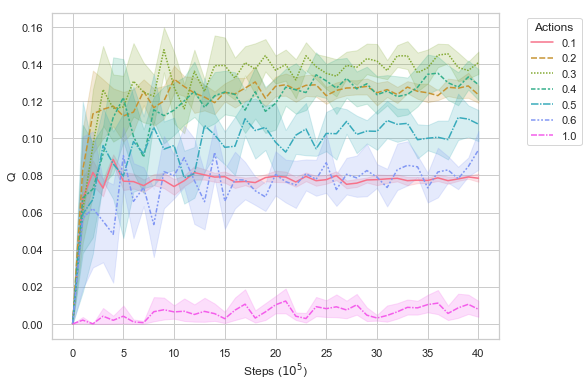

In [30]:
plt.figure(figsize=(8,6))
palette = sns.color_palette("husl", 7)
g = sns.lineplot(data=Qdf, x='step', y='Q', hue='Actions', palette=palette, ci=95, style='Actions')
# g.despine(left=True)
# title
plt.legend(bbox_to_anchor=(1.05, 1), title='Actions')
g.set(xlabel=r'Steps ($10^5$)')
plt.savefig('Q_oneside.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)

In [10]:
pI.shape

(10, 401, 2)

In [14]:
n_period

41

In [13]:
val.shape

(401,)

In [17]:
df_temp = []
for ins in range(n_ins):
    for agent in range(n_agents):
        val = pI[ins, :, agent]
        df_temp.append(pd.DataFrame({'Inventory':val, 'instance': ins*np.ones(n_period), 
                                     'Agent':[str(agent+1),]*n_period, 'step': np.arange(n_period)}))
Idf = pd.concat(df_temp)

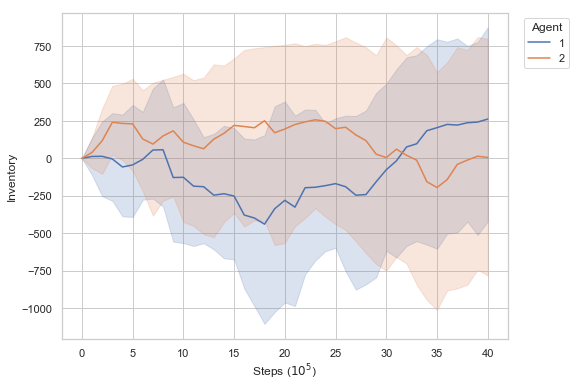

In [19]:
plt.figure(figsize=(8,6))
palette = sns.color_palette("husl", n_act)
g = sns.lineplot(data=Idf, x='step', y='Inventory', hue='Agent')
plt.legend(bbox_to_anchor=(1.15, 1), title='Agent')
g.set(xlabel=r'Steps ($10^5$)')
plt.savefig('Inv_twosides.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)